# Введение в ТВиМС: практикум по описанию выборок №2

*Алла Тамбовцева, НИУ ВШЭ*

## Часть 1: построение гистограммы

Вновь импортируем библиотеку `numpy` для работы с массивами и модуль `pyplot` из библиотеки `matplotlib` для отрисовки графиков:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Создадим массив `turnout` со значениями явки из семинарского листочка:

In [2]:
turnout = np.array([38.19, 44.20, 37.31, 37.58, 
          36.62, 46.16, 37.65, 35.02, 35.24])
print(turnout)

[38.19 44.2  37.31 37.58 36.62 46.16 37.65 35.02 35.24]


Построим для этой выборки гистограмму:

(array([2., 1., 4., 0., 0., 0., 0., 0., 1., 1.]),
 array([35.02 , 36.134, 37.248, 38.362, 39.476, 40.59 , 41.704, 42.818,
        43.932, 45.046, 46.16 ]),
 <a list of 10 Patch objects>)

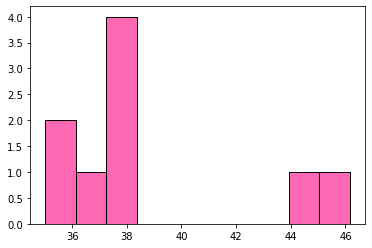

In [3]:
# color: цвет заливки
# edgecolor: цвет границ, k – сокращение от black

plt.hist(turnout, color = "hotpink", edgecolor = "k")

Функция `hist()` сама подбирает шаг и нужное число столбцов для гистограммы. Но выставить желаемое число столбцов или шаг тоже можно, воспользовавшись аргументом `bins`. В него можно подставить нужное число столбцов:

(array([7., 0., 2.]),
 array([35.02      , 38.73333333, 42.44666667, 46.16      ]),
 <a list of 3 Patch objects>)

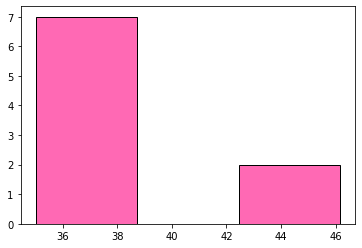

In [4]:
# например, 3
plt.hist(turnout, bins = 3, color = "hotpink", edgecolor = "k")

Также в этот аргумент можно подставить список или массив с границами столбцов. Попробуем воспроизвести те гистограммы, которые мы строили вручную. Зафиксируем стартовую и конечную точку. Стартовая точка была по условию равна 35, а конечную посчитаем самостоятельно – округлим максимальное значение в меньшую сторону и возьмем следующее за ним :

In [5]:
start = 35
end = int(turnout.max()) + 1

Теперь сформируем набор чисел от `start` до `end` с шагом 2 – это и будет шаг гистограммы:

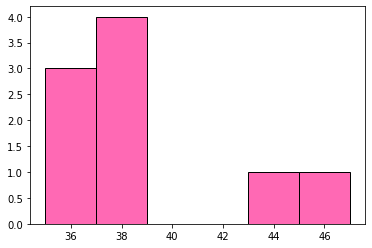

In [6]:
# помним про range(), не забываем +1 

plt.hist(turnout, bins = range(start, end + 1, 2), 
        color = "hotpink", edgecolor = "k");

Теперь построим гистограмму с шагом 4:

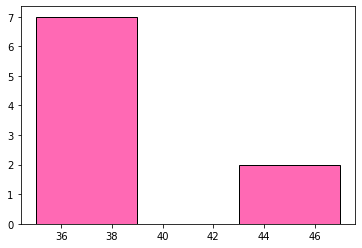

In [7]:
plt.hist(turnout, bins = range(start, end + 1, 4), 
        color = "hotpink", edgecolor = "k");

## Часть 2: выборочная дисперсия и стандартное отклонение

Посчитаем выборочную оценку дисперсии:

In [8]:
print(turnout.var())

13.36433333333333


**Важно:** Python коварен, он по умолчанию считает смещенную оценку дисперсии (которая с $n$ в знаменателе, а не с $n-1$). Чаще всего нас это не устраивает, поэтому запросим несмещенную оценку – попросим вычитать 1 в знаменателе:

In [9]:
# аргумент ddof = 1

print(turnout.var(ddof = 1))

15.034874999999996


Со стандартным отклонение то же самое:

In [10]:
print(turnout.std(ddof = 1))

3.877483075398266


### Часть 3: предельные теоремы

Для этой части нам потребуется модуль `stats` из библиотеки `scipy` – будем генерировать случайные выборки:

In [11]:
from scipy import stats

Давайте визуализируем действие закона больших чисел. 

> **Закон больших чисел.** С увеличением размера выборки, среднее значение выборки становится ближе к среднему значению генеральной совокупности.

Возьмем выборки разного размера из нормального распределения со средним значением 168 и стандартным отклонением 2 (можно считать, что мы извлекаем выборки из генеральной совокупности, которая представляет собой набор значений роста женщин в сантиметрах).

Начнем с небольшой выборки в 10 наблюдений.

In [12]:
# norm: нормальное распределение со средним loc и ст отклонением scale
# rvs: выборка, от random variable sample

sample01 = stats.norm.rvs(loc = 168, scale = 2, size=10)
print(sample01)

[168.820987   167.57992973 173.85091224 166.2265467  168.11245187
 170.21872813 168.88667925 171.9283559  165.92869349 169.15312952]


Теперь сгенерируем выборки из 100 и 1500 наблюдений:

In [13]:
sample02 = stats.norm.rvs(loc = 168, scale = 2, size=100)
sample03 = stats.norm.rvs(loc = 168, scale = 2, size=1500)

Сравним средние выборок:

In [14]:
print(sample01.mean())
print(sample02.mean())
print(sample03.mean())

169.07064138215762
168.27520438134118
168.02119805846888


Действительно, самое близкое к среднему генеральной совокупности 168 среднее последней, самой большой выборки.

Заодно построим гистограммы для каждой выборки и убедимся, что с увеличением объема выборки распределение выборки все больше похоже на распределение генеральной совокупности, то есть на нормальное в нашем случае:

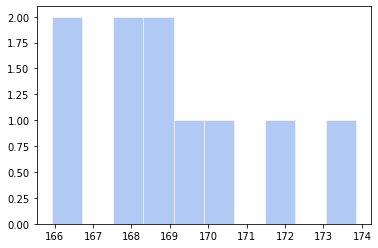

In [15]:
plt.hist(sample01, color = "cornflowerblue", edgecolor = "white", alpha=0.5);

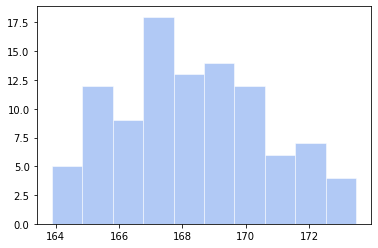

In [16]:
plt.hist(sample02, color = "cornflowerblue", edgecolor = "white", alpha=0.5);

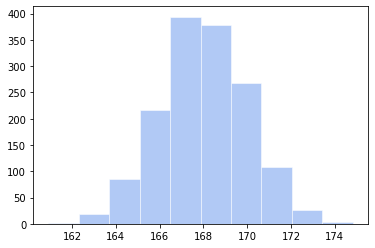

In [17]:
plt.hist(sample03, color = "cornflowerblue", edgecolor = "white", alpha=0.5);

Теперь визуализируем действие центральной предельной теоремы.

> **Центральная предельная теорема.** Пусть у нас есть генеральная совокупность со средним значением $\mu$ и стандартным отклонением $\sigma$. Если мы извлечем из этой совокупности все возможные выборки достаточно большого размера $n$ ($n \geqslant 30$) и посчитаем по каждой выборке среднее значение, то эти средние значения будут примерно нормально распределены со средним $\mu$ и стандартным отклонением $\frac{\sigma}{\sqrt{n}}$.

Сформируем генеральную совокупность – 10000 значений из равномерного распределения на отрезке от 0 до 1:

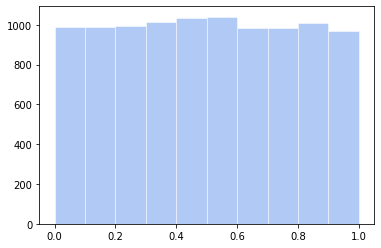

In [18]:
population = stats.uniform.rvs(size = 10000)
plt.hist(population, color = "cornflowerblue", edgecolor = "white", alpha=0.5);

Видно, что распределение на нормальное совсем не похоже, это ожидаемо – оно равномерное :)
Зафиксируем среднее и стандартное отклонение генеральной совокупности:

In [19]:
print("Mean: ", population.mean())
print("St Deviation: ", population.std(ddof = 1))

Mean:  0.49889629993662493
St Deviation:  0.2865068970135882


Теперь выберем из этой генеральной совокупности 10000 выборок по 1000 наблюдений (все возможные выборки не будем, очень много, можете посчитать $C_{10000}^{1000}$) и зафиксируем среднее по каждой выборке. 

Для псевдослучайного выбора воспользуемся `random.choice()` из `numpy`:

In [20]:
means = []

# выбираем 10000 раз разные выборки с n=1000 из population
# считаем среднее по каждой и добавляем в means

for i in range(10000):
    sample = np.random.choice(population, size = 1000)
    avg = sample.mean()
    means.append(avg)
    
# преобразуем в массив для удобства

means = np.array(means)

А теперь магия (действие центральной предельной теоремы)! Построим гистограмму для набора из полученных выборочных средних:

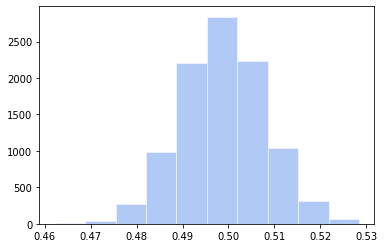

In [21]:
plt.hist(means, color = "cornflowerblue", edgecolor = "white", alpha=0.5);

Распределение средних, действительно, оказалось нормальным, хотя выборки мы извлекали из равномерного распределения, которое на нормальное совсем не похоже. Проверим параметры полученного распределения:

In [22]:
print("Mean: ", means.mean())
print("St Deviation: ", means.std(ddof = 1))

Mean:  0.498860747704185
St Deviation:  0.009054966571835136


Среднее, полученное по набору выборочных средних («среднее средних») практически совпадает со средним генеральной совокупности `population`. А вот стандартное отклонение, по идее, должно примерно совпадать со стандартным отклонением `population`, уменьшенным в $\sqrt{1000}$ раз, так как мы извлекали выборки объема $n = 1000$:

In [23]:
print(population.std(ddof = 1) / np.sqrt(1000)) # есть такое

0.009060143599102326


Всё!